In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from mnist_code import LoadMNIST
from mnist_code import visualize_mnist
from mnist_code import get_statistics
from mnist_code import plot_distribution
from mnist_code import get_class_statistics

In [2]:
# load mnist train and test set/loader
mnist = LoadMNIST()
train, test = mnist.load_raw()
train_loader, test_loader = mnist.load_tensor()

# Data Visualization

1. Show number of data points for train and test set
2. Show number of classes in dataset
3. Visualize some samples
4. Visaulize some samples with a binary threshold
5. Show train and test set mean and standard deviation
6. Plot class distribution for train and test set
7. Apply down-projection to see patterns in the data


### 1. Show number of data points for train and test set

In [3]:
print(f"""Number of data points in train set: {len(train)}\n 
Number of data points in test set: {len(test)}""")

Number of data points in train set: 60000
 
Number of data points in test set: 10000


We see that the dataset has a 6:1 ratio of train:test set samples.

### 2. Show number of classes in dataset

In [4]:
num_classes = len(train.classes)
print(f"Number of classes in MNIST dataset: {num_classes}")
for i, label in enumerate(train.classes):
    print(f"Label {i}: {label}")

Number of classes in MNIST dataset: 10
Label 0: 0 - zero
Label 1: 1 - one
Label 2: 2 - two
Label 3: 3 - three
Label 4: 4 - four
Label 5: 5 - five
Label 6: 6 - six
Label 7: 7 - seven
Label 8: 8 - eight
Label 9: 9 - nine


### 3. Visualize some samples

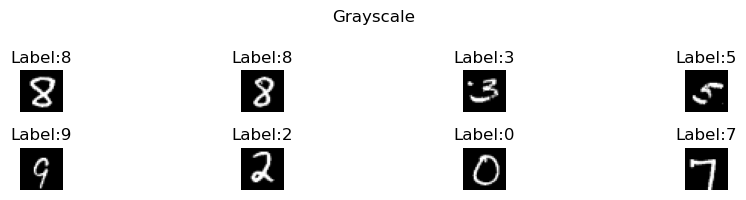

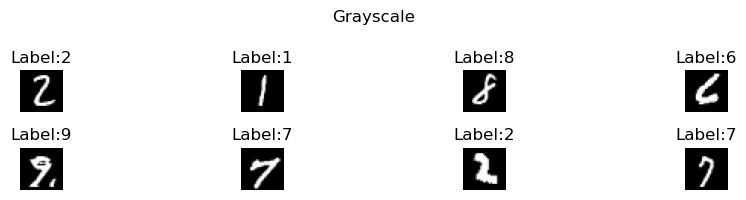

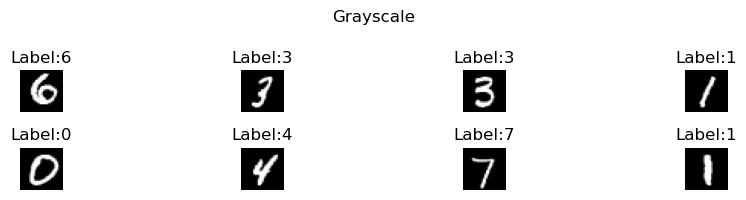

In [5]:
for i in range(3):
    # torch.manual_seed(42)
    visualize_mnist(train_loader)

We know that hand-written numbers can vary. (e.g. 1s may look like 7s, 4s may look like 9s.)

### 4. Visaulize some samples with a binary threshold

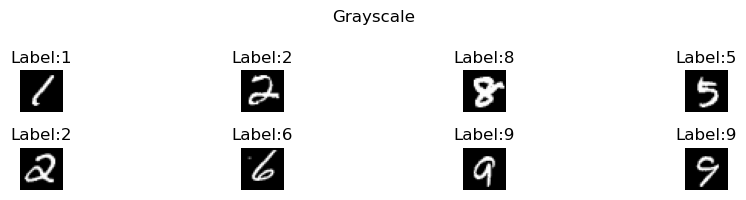

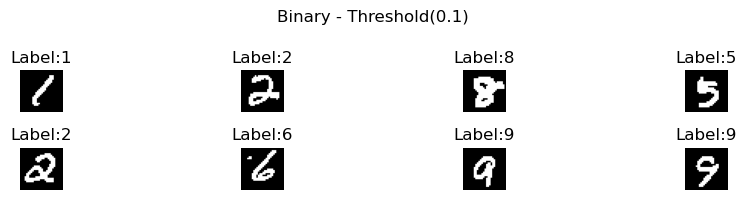

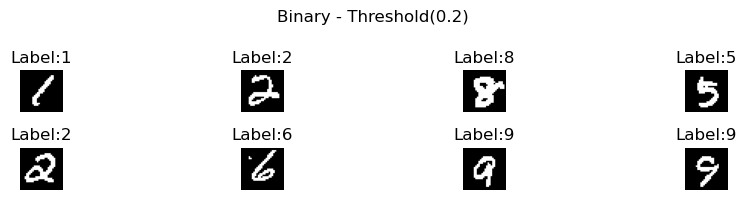

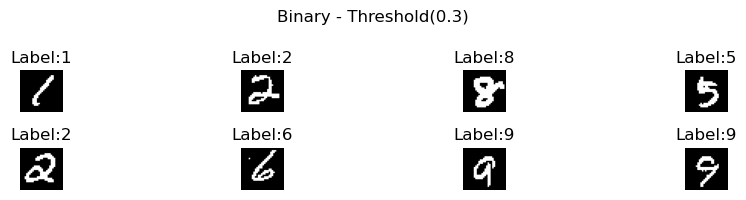

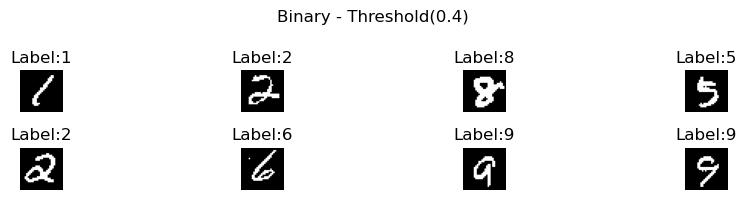

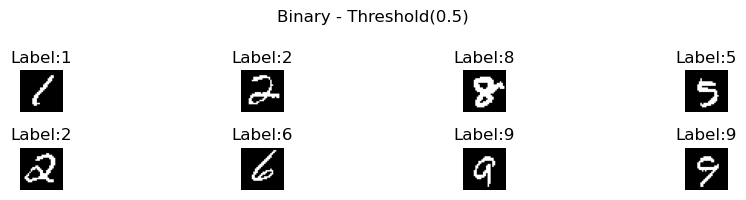

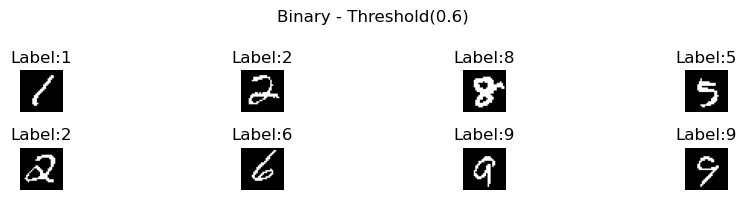

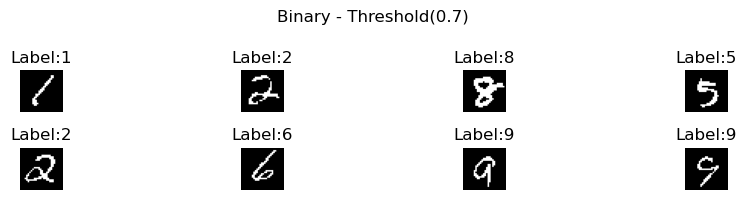

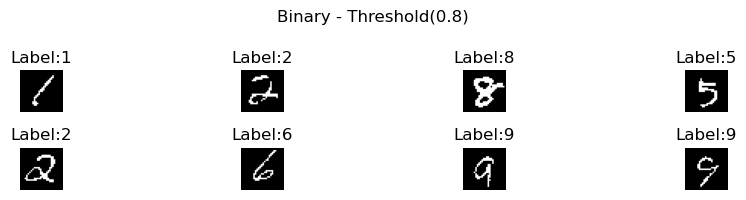

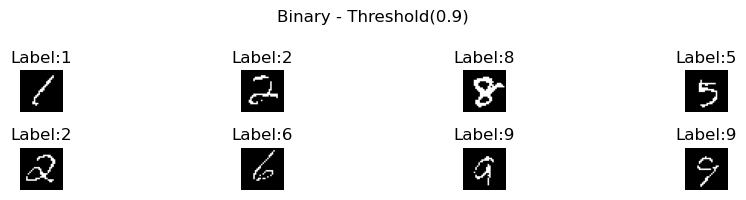

In [6]:
threshold = 0.1
torch.manual_seed(42)
visualize_mnist(train_loader)
for i in range(9):
    torch.manual_seed(42)
    visualize_mnist(train_loader, binary=True, binary_threshold=round(threshold+(i*threshold),1))

We see that with a threshold of 0.4/0.5 the numbers look quite similar to their greyscale counter-parts. The benefit of applying a binary threshold, in my opinion, is that we remove numbers which may be unnecessary for the model or at the very least that the model only has to handle black or white values.

### 5. Show train and test set mean and standard deviation

In [7]:
print("Train set statistics")
get_statistics(train_loader)
print("\n")
print("Test set statistics")
get_statistics(test_loader)

print("Train set class statistics")
get_class_statistics(train_loader)
print("\n")
print("Test set class statistics")
get_class_statistics(test_loader)

Train set statistics
Tensor mean and standard deviation
Mean: 0.131, StDev: 0.308
Images (8-bit) mean and standard deviation
Mean: 33, StDev: 78


Test set statistics
Tensor mean and standard deviation
Mean: 0.133, StDev: 0.310
Images (8-bit) mean and standard deviation
Mean: 33, StDev: 79
Train set class statistics
Label 0:

Tensor mean and standard deviation
Mean: 0.173, StDev: 0.348
Images (8-bit) mean and standard deviation
Mean: 44, StDev: 88

Label 1:

Tensor mean and standard deviation
Mean: 0.076, StDev: 0.245
Images (8-bit) mean and standard deviation
Mean: 19, StDev: 62

Label 2:

Tensor mean and standard deviation
Mean: 0.149, StDev: 0.325
Images (8-bit) mean and standard deviation
Mean: 38, StDev: 82

Label 3:

Tensor mean and standard deviation
Mean: 0.142, StDev: 0.319
Images (8-bit) mean and standard deviation
Mean: 36, StDev: 81

Label 4:

Tensor mean and standard deviation
Mean: 0.121, StDev: 0.297
Images (8-bit) mean and standard deviation
Mean: 30, StDev: 75

Label 5

### 6. Plot class distribution for train and test set

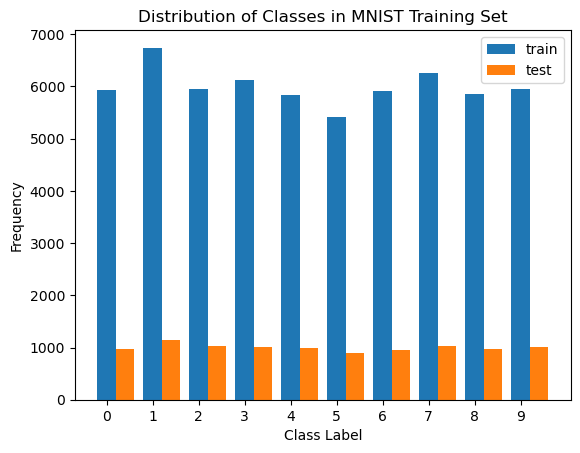

In [8]:
plot_distribution(train=train, test=test)

### 7.  Apply down-projection to see patterns in the data